# Object detection with pretrained Retinanet

This uses pretrained Retinanet model to detect objects. The code is applied based on Lazyprogrammer's Advanced Computer vision course.

## 1. Load the model

In [4]:
pip install keras-retinanet

     |████████████████████████████████| 71kB 2.5MB/s 
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp36-cp36m-linux_x86_64.whl size=163938 sha256=68a409817e9bbcdbfe47502e4da94e8c05b04aef4b9d0127cab20875c4dc16ad
  Stored in directory: /root/.cache/pip/wheels/79/1d/fc/496708301dbd84bc2faa258d24d82f39fe46d9701d52287373
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=08636d401f95692aec6748b51c669b9304c33f2b5718341559c2aaca9d37b452
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import urllib
import os
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [7]:
# https://github.com/fizyr/keras-retinanet/releases
# Download pretrained retina model
urllib.request.urlretrieve(
    'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5',
    'pretrained_model.h5')


('pretrained_model.h5', <http.client.HTTPMessage at 0x7f44ed6a8d30>)

In [8]:
# load in the model
model=models.load_model('pretrained_model.h5')

In [9]:
# Load the class names for coco categories
!wget https://lazyprogrammer.me/course_files/obj_detection/coco_categories.txt

--2020-12-03 08:15:51--  https://lazyprogrammer.me/course_files/obj_detection/coco_categories.txt
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘coco_categories.txt’

coco_categories.txt     [ <=>                ]     621  --.-KB/s    in 0s      

2020-12-03 08:15:52 (10.4 MB/s) - ‘coco_categories.txt’ saved [621]



In [14]:
# Load the class names for the classes that the model was pretrained on
# The class names are in the order of class indices that the model predicts
class_names = [l.rstrip() for l in open('coco_categories.txt')]

## 2. Use the pretrained Retinanet model for object detection

In [37]:
# Function for drawing an image and predicted labels for detected objects
# Only predictions with probability higher than threshold are shown
def show_image_with_predictions(img_path, threshold=0.6):
  img = np.array(Image.open(img_path))
  print(f"img.shape: {img.shape}")
  img=img[:,:,:3] # remove possible alpha channel

  # get predictions
  imp=preprocess_image(img)
  imp,scale=resize_image(img)
  
  boxes,scores,labels=model.predict_on_batch(np.expand_dims(imp,axis=0))
  boxes /=scale # standardise box coordinates

  # loop through each predicted object for the input image
  for box, score, label in zip(boxes[0],scores[0],labels[0]):
    # scores are sorted so we can define break based on score
    if score < threshold:
      break
    box=box.astype(np.int32)
    color=label_color(label)
    draw_box(img, box, color=color)

    class_name=class_names[label]
    caption=f'{class_name} {score:.3f}'
    draw_caption(img, box, caption)
  plt.axis('off')
  plt.imshow(img)
  plt.show()

In [40]:
# Let's download some images
!wget -q https://lazyprogrammer.me/course_files/obj_detection/baseball.jpg
!wget -q https://lazyprogrammer.me/course_files/obj_detection/cars.jpg
!wget -q https://lazyprogrammer.me/course_files/obj_detection/crosswalk.jpg
!wget -q https://lazyprogrammer.me/course_files/obj_detection/laptop.jpg

img.shape: (430, 638, 3)


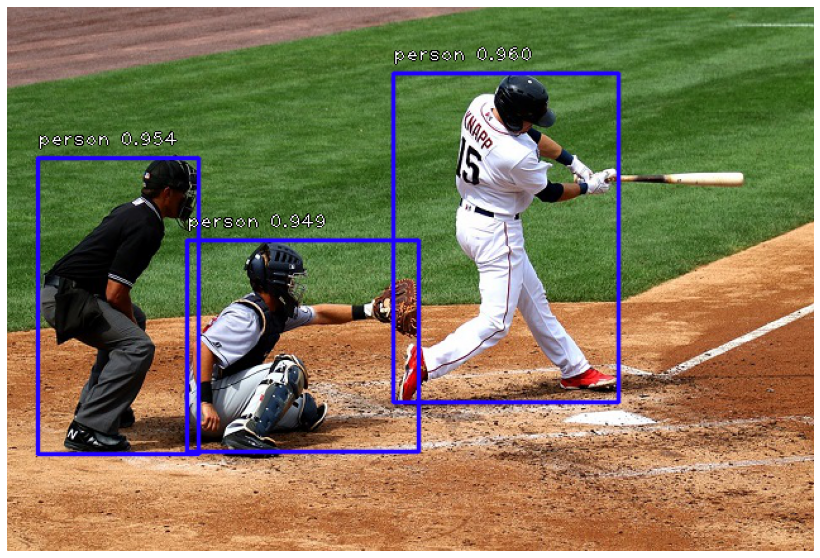

In [34]:
# Then test how Retina model works 
plt.rcParams['figure.figsize']=[20,10]
show_image_with_predictions('baseball.jpg')

img.shape: (430, 638, 3)


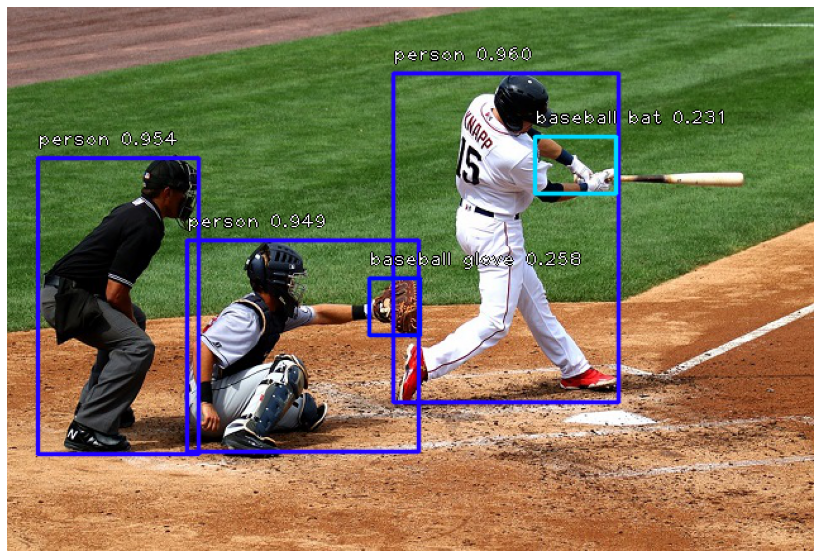

In [35]:
# Let's lower the threshold to see if some other objects are also detected
show_image_with_predictions('baseball.jpg',threshold=0.2)

img.shape: (666, 1000, 3)


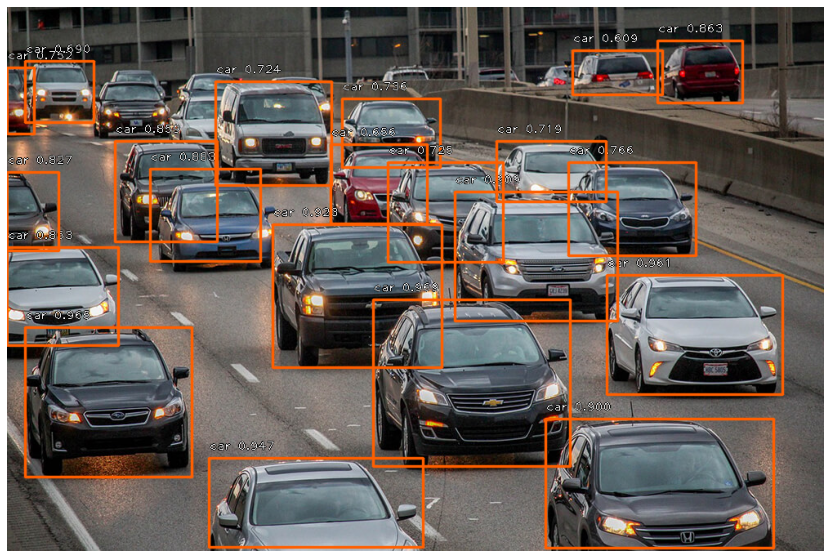

In [38]:
show_image_with_predictions('cars.jpg')

img.shape: (384, 512, 3)


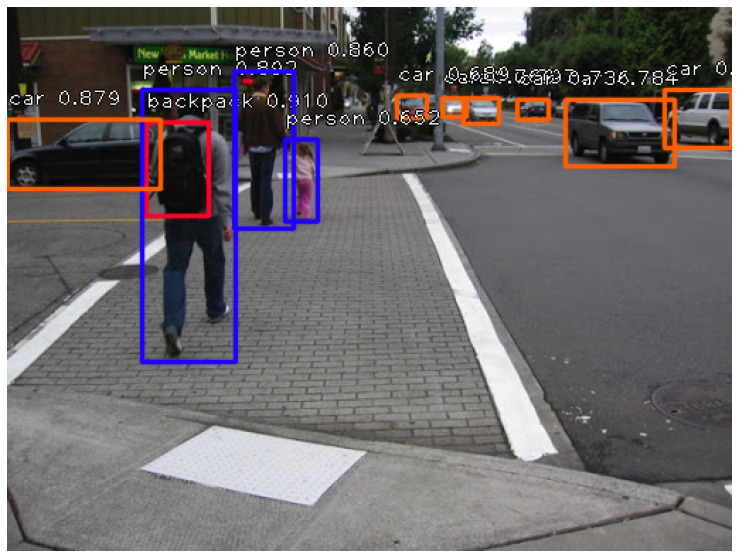

In [41]:
show_image_with_predictions('crosswalk.jpg')

img.shape: (618, 960, 3)


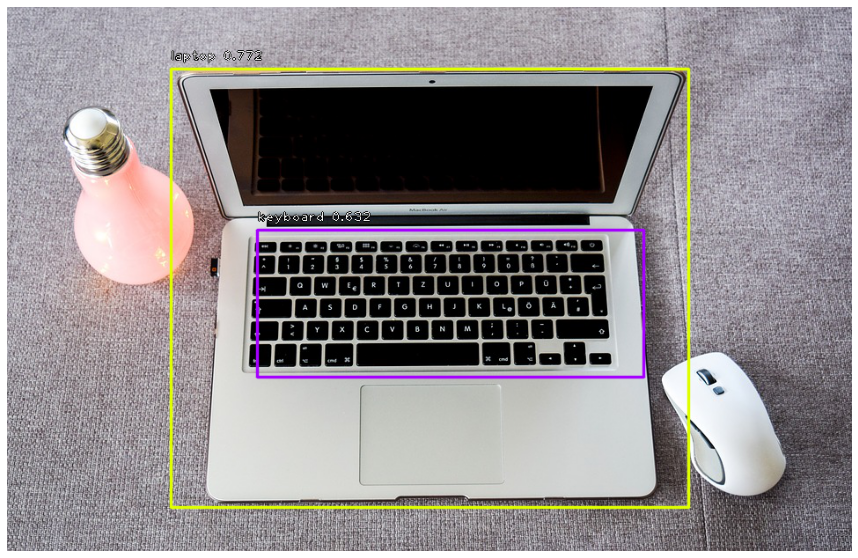

In [42]:
show_image_with_predictions('laptop.jpg')

img.shape: (618, 960, 3)


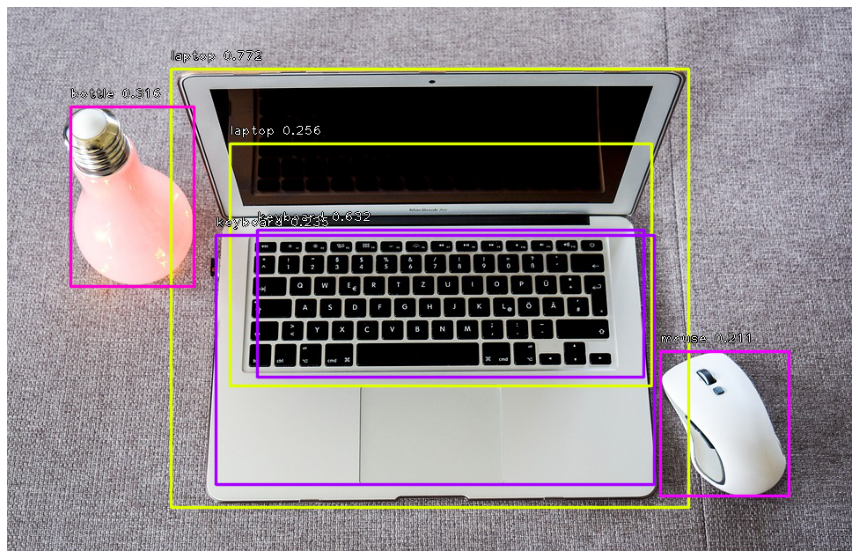

In [43]:
# Let's again lower the threshold
show_image_with_predictions('laptop.jpg', threshold=0.2)